In [1]:
from ml_config import *
import gen as g

In [2]:
user = g.user()

In [3]:
len(user)

22873

In [4]:
user.head()

,REG_DATE,SEX_ID,AGE,WITHDRAW_DATE,PREF_NAME,USER_ID_hash
0,2012-03-28 14:14:18,f,25,NaN,NaN,d9dca3cb44bab12ba313eaa681f663eb
1,2011-05-18 00:41:48,f,34,NaN,Tokyo,560574a339f1b25e57b0221e486907ed
2,2011-06-13 16:36:58,m,41,NaN,Aichi Prefecture,e66ae91b978b3229f8fd858c80615b73
3,2012-02-08 12:56:15,m,25,NaN,NaN,43fc18f32eafb05713ec02935e2c2825
4,2011-05-22 23:43:56,m,62,NaN,Kanagawa Prefecture,dc6df8aa860f8db0d710ce9d4839840f


In [5]:
user.columns

Index(['REG_DATE', 'SEX_ID', 'AGE', 'WITHDRAW_DATE', 'PREF_NAME',
       'USER_ID_hash'],
      dtype='object')

m    11890
f    10983
Name: SEX_ID, dtype: int64

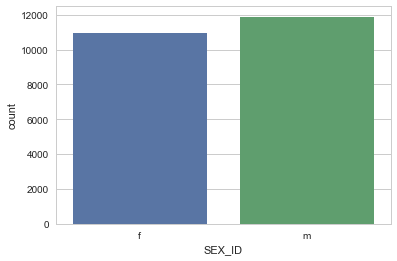

In [6]:
sns.countplot(x='SEX_ID', data = user)
user['SEX_ID'].value_counts()

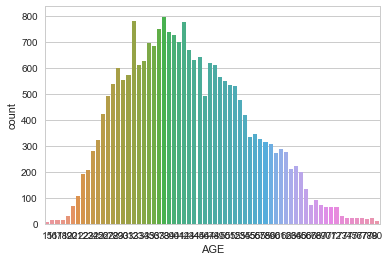

In [7]:
sns.countplot(x='AGE',data = user)

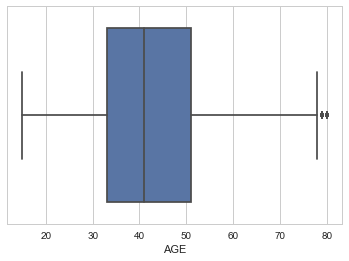

count    22873.000000
mean        42.497836
std         11.843465
min         15.000000
25%         33.000000
50%         41.000000
75%         51.000000
max         80.000000
Name: AGE, dtype: float64


In [8]:
# AGE Boxplot
sns.boxplot(user['AGE'])
plt.show()

print(user['AGE'].describe())

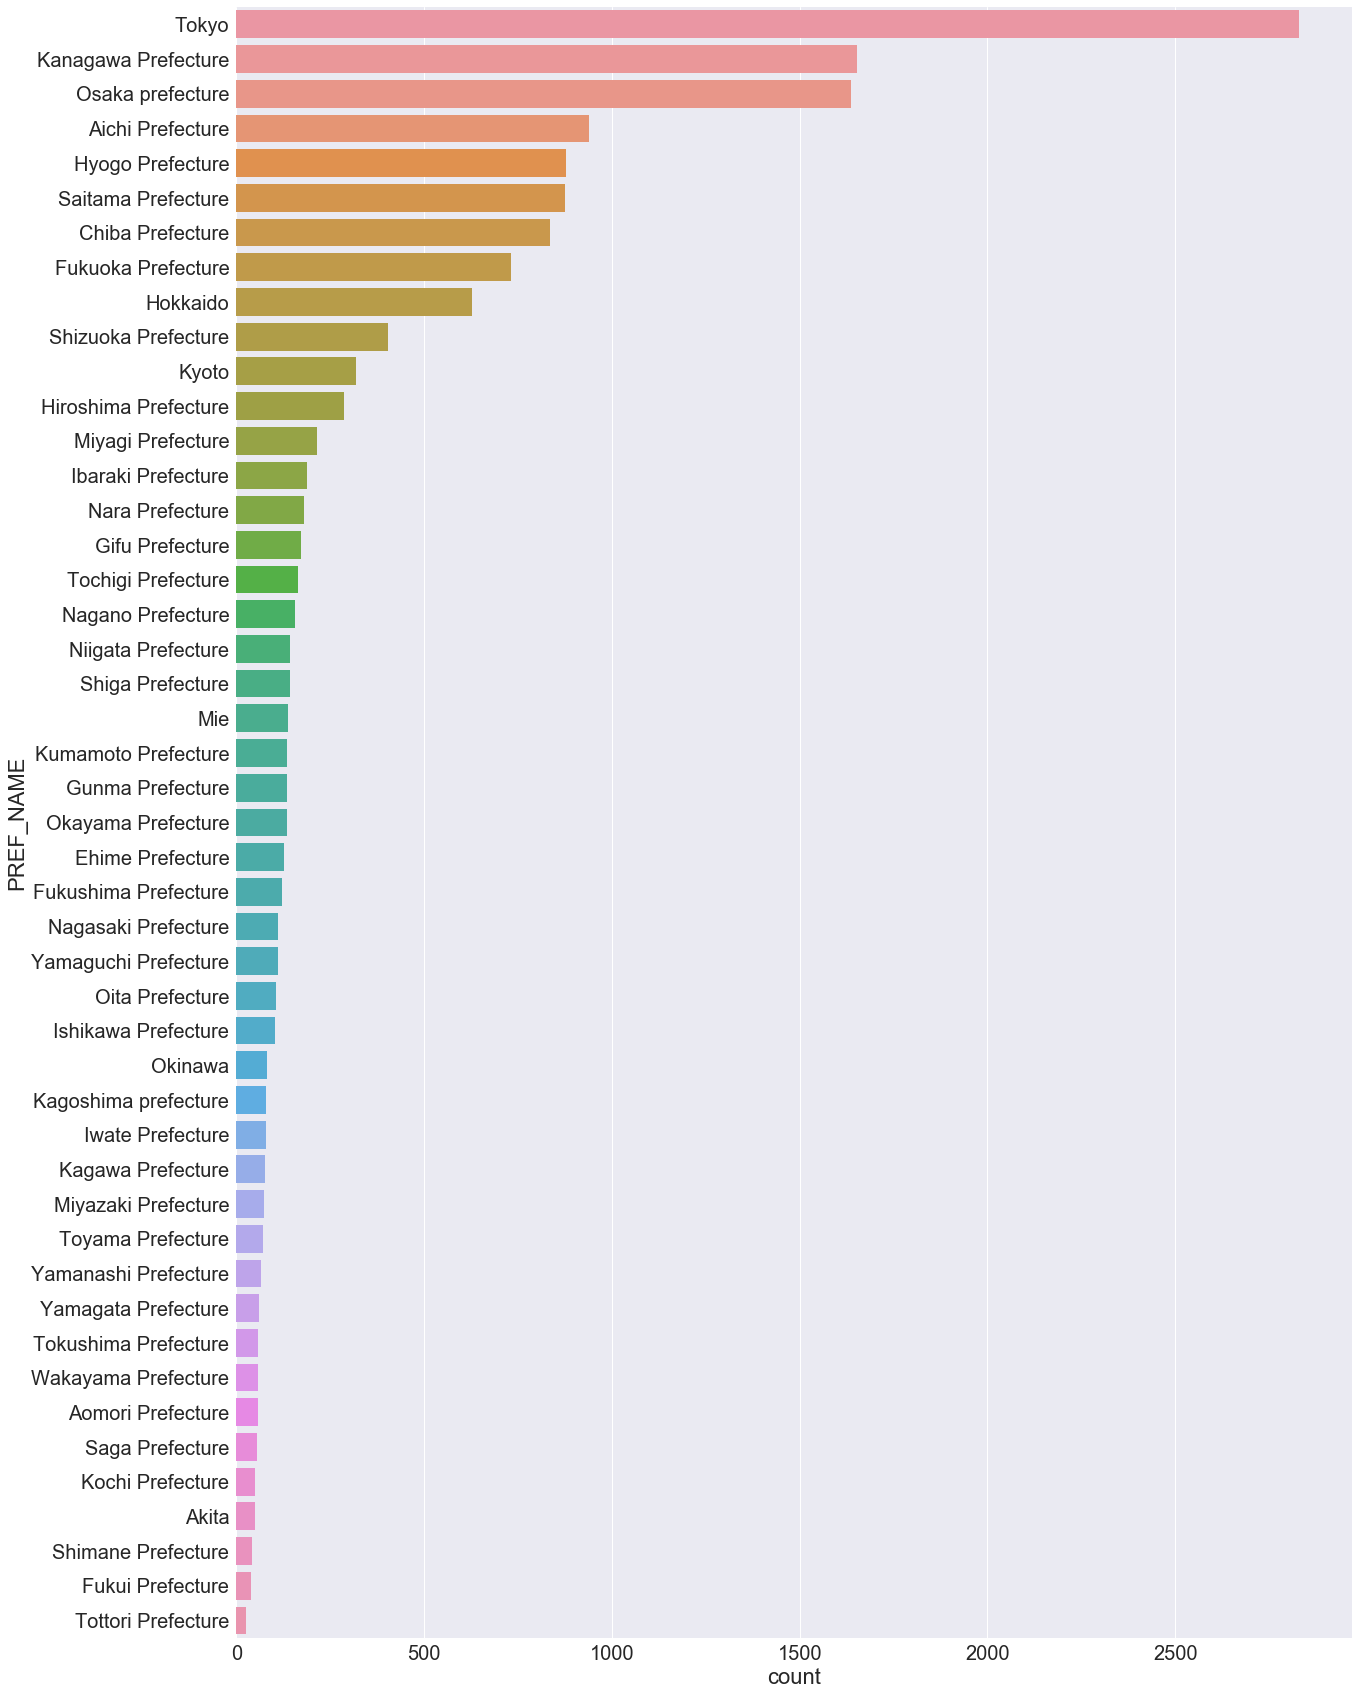

In [9]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 30))
sns.countplot(y='PREF_NAME',data = user, order=user['PREF_NAME'].value_counts().index)

In [21]:
user['PREF_NAME'].value_counts()

Tokyo                   2830
Kanagawa Prefecture     1653
Osaka prefecture        1638
Aichi Prefecture         938
Hyogo Prefecture         879
Saitama Prefecture       874
Chiba Prefecture         835
Fukuoka Prefecture       731
Hokkaido                 628
Shizuoka Prefecture      405
Kyoto                    318
Hiroshima Prefecture     287
Miyagi Prefecture        215
Ibaraki Prefecture       187
Nara Prefecture          180
Gifu Prefecture          171
Tochigi Prefecture       165
Nagano Prefecture        155
Niigata Prefecture       144
Shiga Prefecture         142
Mie                      138
Kumamoto Prefecture      135
Gunma Prefecture         135
Okayama Prefecture       134
Ehime Prefecture         126
Fukushima Prefecture     121
Nagasaki Prefecture      111
Yamaguchi Prefecture     110
Oita Prefecture          107
Ishikawa Prefecture      102
Okinawa                   83
Kagoshima prefecture      80
Iwate Prefecture          80
Kagawa Prefecture         76
Miyazaki Prefe

In [10]:
date = user['WITHDRAW_DATE']
date[date.notnull()]

16       2012-01-26 11:54:33
20       2012-01-09 07:31:51
62       2012-03-23 21:46:14
69       2012-02-03 19:10:47
73       2011-10-03 12:35:03
99       2011-08-21 19:34:31
108      2012-04-12 22:33:48
110      2012-04-29 22:42:35
122      2011-08-06 21:47:05
179      2011-07-22 17:44:51
186      2012-01-31 08:28:11
212      2012-02-10 11:31:18
223      2011-10-15 17:14:28
253      2011-09-04 12:04:51
326      2012-04-12 15:38:58
336      2011-11-28 17:03:15
368      2011-08-04 09:38:53
379      2012-01-06 03:05:50
380      2012-07-01 10:54:20
385      2012-02-10 12:34:47
398      2011-09-06 05:14:55
428      2011-12-02 12:21:39
461      2011-08-13 23:51:55
486      2012-01-31 15:12:51
511      2011-12-19 19:01:11
545      2012-05-07 21:09:08
563      2011-12-13 19:38:04
588      2011-09-01 23:33:40
671      2011-10-18 12:49:49
674      2011-08-07 18:58:32
                ...         
22232    2012-02-18 02:07:05
22287    2011-08-29 13:34:19
22294    2011-08-02 08:30:17
22304    2012-

# 1. 고객들은 30대~50대가 주로 많음
# 2. 남자 11890명, 여자 10983명, 총 22873명
# 3. Tokyo, Kanagawa, Osaka에 고객많음
# 4. 탈퇴날짜는 922명만 기록되있음
# ==> 922명만 탈퇴했다

In [11]:
# 날짜를 나눠서 보기
user["REG_DATE"] = pd.to_datetime(user["REG_DATE"]) 
user["REG_YEAR"] = user["REG_DATE"].dt.year 
user["REG_MONTH"] = user["REG_DATE"].dt.month 
user["REG_HOUR"] = user["REG_DATE"].dt.hour
user["REG_WEEKDAY"] = user["REG_DATE"].dt.weekday

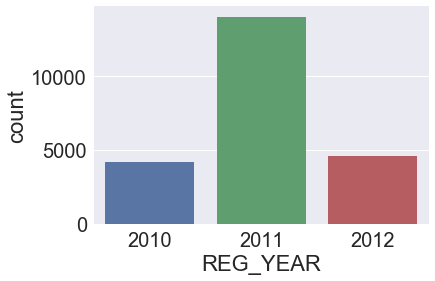

In [12]:
sns.countplot(x='REG_YEAR',data = user)

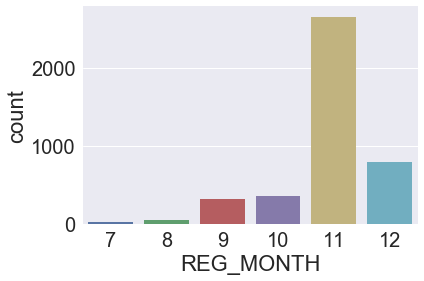

In [13]:
sns.countplot(x='REG_MONTH',data=user[user['REG_YEAR']==2010])

# 2010년 11월달에 프로모션이 있었다

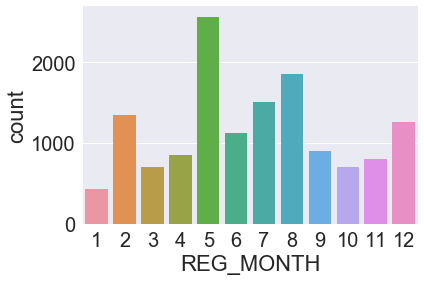

In [14]:
sns.countplot(x='REG_MONTH',data=user[user['REG_YEAR']==2011])

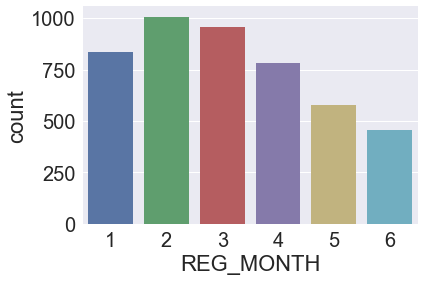

In [15]:
sns.countplot(x='REG_MONTH',data=user[user['REG_YEAR']==2012])

In [16]:
# 날짜를 나눠서 보기
user["WITHDRAW_DATE"] = pd.to_datetime(user["WITHDRAW_DATE"]) 
user["WITHDRAW_YEAR"] = user["WITHDRAW_DATE"].dt.year 
user["WITHDRAW_MONTH"] = user["WITHDRAW_DATE"].dt.month 
user["WITHDRAW_HOUR"] = user["WITHDRAW_DATE"].dt.hour
user["WITHDRAW_WEEKDAY"] = user["WITHDRAW_DATE"].dt.weekday

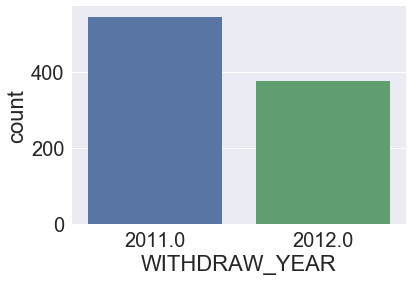

In [17]:
sns.countplot(x='WITHDRAW_YEAR',data=user)

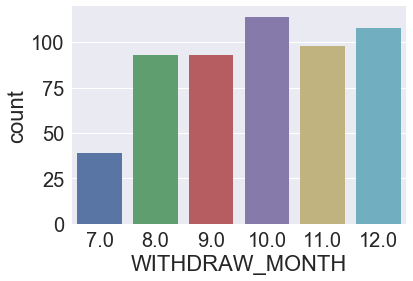

In [18]:
sns.countplot(x='WITHDRAW_MONTH',data = user[user['WITHDRAW_YEAR']==2011])

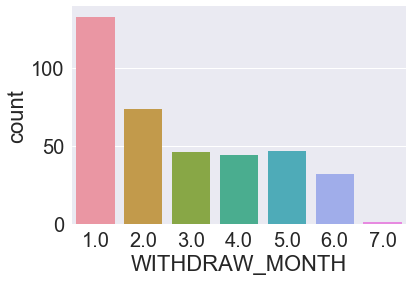

In [19]:
sns.countplot(x='WITHDRAW_MONTH',data = user[user['WITHDRAW_YEAR']==2012])

# 2012년 1월을 시작으로 탈퇴율이 줄어듦

---------------

# 1. 고객들은 30대~50대가 주로 많음
# 2. 남자 11890명, 여자 10983명, 총 22873명
# 3. Tokyo, Kanagawa, Osaka에 고객많음
# 4. 탈퇴날짜는 922명만 기록되있음
# ==> 922명만 탈퇴했다
# 5. 고객들 등록율은 500~1000으로 고만고만한 편
# 다만 2010년 11월에 팍 치솟음
# 6. 2011년 6월 ~ 2012년 7월 사이에 탈퇴율이 증가하다 감소함
# 2012년 2월에 탈퇴율이 확 줄음